In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table, Column

In the categorization file, 1 corresponds to young stars and 0 corresponds to old stars

In [2]:
# Open the Gaia data file
gaia_fits = fits.open('Gaia.fits')  # This file is a subset (containing nearly 570,000 stars) of the entire Gaia dataset
gaia_header = gaia_fits[1].header
gaia_data = gaia_fits[1].data
gaia_header

XTENSION= 'TABLE   '           / Ascii Table Extension (TAB and NEWLINE sep)    
BITPIX  =                    8 / Character data                                 
NAXIS   =                    2 / Simple 2-D matrix                              
NAXIS1  =                  297 / Number of bytes per record                     
NAXIS2  =               569365 / Number of records                              
PCOUNT  =                    0 / Get rid of random parameters                   
GCOUNT  =                    1 / Only one group (isn't it obvious?)             
TFIELDS =                   29 / Number of data fields (columns)                
CDS-CAT = 'I/345   '           / Catalogue designation in CDS nomenclature      
         Gaia DR2 (Gaia Collaboration, 2018)                                    
EXTNAME = 'I_345_gaia2'        / Identification of the table                    
CDS-NAME= 'I/345/gaia2'        / Table name in METAtab                          
         GaiaSource DR2 data

The following two cells only need to be run once to create the files needed for the remainder of the project

In [3]:
# Match the young/old subsets to the indices of their respective Gaia dataset entries

# The following two files contain the IDs for stars already known to be young (<100 million years) or old (> 100 million years)
young = np.genfromtxt('young.ascii',delimiter=',',dtype=None,names=True)
old = np.genfromtxt('old.ascii',delimiter=',',dtype=None,names=True)  

gaia_IDs = gaia_data['DR2Name']
young_IDs = young['DR2ID']
old_IDs = old['DR2ID']

young_i = []
for i in xrange(young_IDs.size):
    ID_i = young_IDs[i]
    iterator = (j for j,x in enumerate(gaia_IDs) if ID_i.startswith(x))
    new_i = next(iterator,False)
    young_i.append(new_i)

print 'MATCHED YOUNG STARS'

old_i = []
for i in xrange(old_IDs.size):
    ID_i = old_IDs[i]
    iterator = (j for j,x in enumerate(gaia_IDs) if ID_i.startswith(x))
    new_i = next(iterator,False)
    old_i.append(new_i)

print 'MATCHED OLD STARS'

MATCHED YOUNG STARS
MATCHED OLD STARS


In [4]:
# Take the determined indices for each subset and use them to create fits files containing all Gaia data on each of the stars in each subset

gaia_y = Table(names=gaia_data.names)
gaia_y['DR2Name'] = Table.Column(data=[],name='DR2Name', dtype=str)
for i in young_i:
    gaia_y.add_row(gaia_data[i])

gaia_y.write('Known_Young_Gaia.fits',format='fits',overwrite=True)

gaia_o = Table(names=gaia_data.names)
gaia_o['DR2Name'] = Table.Column(data=[],name='DR2Name', dtype=str)
for i in old_i:
    gaia_o.add_row(gaia_data[i])

gaia_o.write('Known_Old_Gaia.fits',format='fits',overwrite=True)

634
5002


/Users/oljver/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
/Users/oljver/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


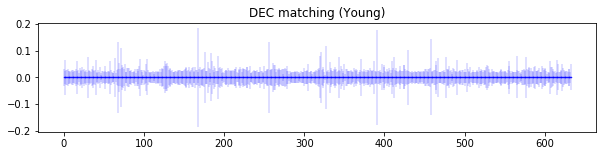

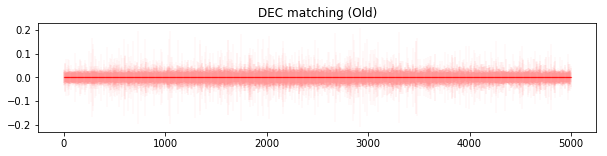

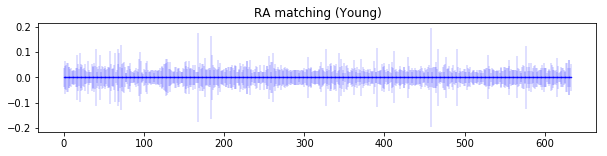

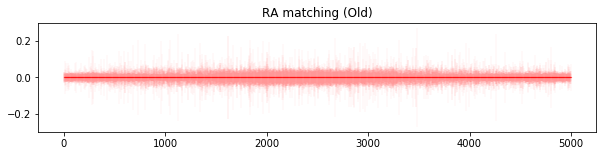

In [3]:
# Confirm that the young/old star subsets were correctly matched to their entries in the full Gaia dataset

gaia_y = fits.open('Known_Young_Gaia.fits')[1].data
gaia_o = fits.open('Known_Old_Gaia.fits')[1].data
print len(gaia_y)
print len(gaia_o)

young = np.genfromtxt('young.ascii',delimiter=',',dtype=None,names=True)
old = np.genfromtxt('old.ascii',delimiter=',',dtype=None,names=True)

young_ra = young['RA']
young_dec = young['Dec']
old_ra = old['RA']
old_dec = old['Dec']

# Get diff in coordinates recorded in Gaia versus the ascii files
y_diff_ra = gaia_y['RA_ICRS']-young_ra
y_diff_dec = gaia_y['DE_ICRS']-young_dec
o_diff_ra = gaia_o['RA_ICRS']-old_ra
o_diff_dec = gaia_o['DE_ICRS']-old_dec

# Plot graphs to confirm that all coordinate errors are consistent with zero using the relevent Gaia uncertainties
# Incorrect matches would appear as data points not near zero on either the Dec- or RA-difference plots

plt.figure(1,figsize=(10,2))
plt.clf()
plt.errorbar(np.arange(y_diff_dec.size),y_diff_dec,yerr=gaia_y['E_DE_ICRS'],elinewidth=0.25,markersize=1.0,fmt='b.')
plt.title('DEC matching (Young)')
plt.show()

plt.figure(2,figsize=(10,2))
plt.clf()
plt.errorbar(np.arange(o_diff_dec.size),o_diff_dec,yerr=gaia_o['E_DE_ICRS'],elinewidth=0.05,markersize=0.1,fmt='r.')
plt.title('DEC matching (Old)')
plt.show()

plt.figure(3,figsize=(10,2))
plt.clf()
plt.errorbar(np.arange(y_diff_ra.size),y_diff_ra,yerr=gaia_y['E_RA_ICRS'],elinewidth=0.25,markersize=1.0,fmt='b.')
plt.title('RA matching (Young)')
plt.show()

plt.figure(4,figsize=(10,2))
plt.clf()
plt.errorbar(np.arange(o_diff_ra.size),o_diff_ra,yerr=gaia_o['E_RA_ICRS'],elinewidth=0.05,markersize=0.1,fmt='r.')
plt.title('RA matching (Old)')
plt.show()

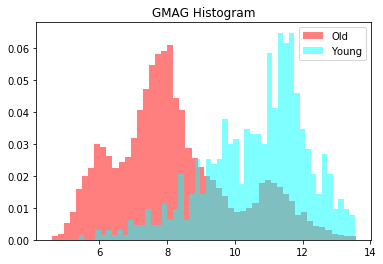

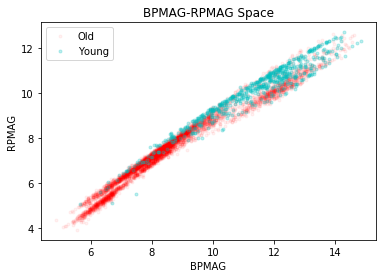

In [4]:
# Visualization of color differences and magnitude differences between young and old training sets

young_gmag = gaia_y['GMAG']
old_gmag = gaia_o['GMAG']
young_bmag = gaia_y['BPMAG']
old_bmag = gaia_o['BPMAG']
young_rmag = gaia_y['RPMAG']
old_rmag = gaia_o['RPMAG']

# Histogram of "green" magnitude normalized to show the fraction of stars in each category contained in each bin
# Normailized because the number of "old" stars is much greater than the number of "young" stars
plt.figure(5)
plt.clf()
plt.hist(old_gmag,bins=50,weights=(np.ones_like(old_gmag)/float(old_gmag.size)),alpha=0.5,color='red',label='Old')
plt.hist(young_gmag,bins=50,weights=(np.ones_like(young_gmag)/float(young_gmag.size)),alpha=0.5,color='cyan',label='Young')
plt.title('GMAG Histogram')
plt.legend()
plt.show()

# Plot in red-blue space to visualize any significant seperation between the two categories in this space
# Opacities chosen to make the general seperation trends more noticable
plt.figure(6)
plt.clf()
plt.plot(old_bmag,old_rmag,'r.',alpha=0.05,label='Old')
plt.plot(young_bmag,young_rmag,'c.',alpha=0.25,label='Young')
plt.title('BPMAG-RPMAG Space')
plt.xlabel('BPMAG')
plt.ylabel('RPMAG')
plt.legend()
plt.show()

In [41]:
# Get 6D coordinates in 3D position-velocity space from ra/dec position-velocity, distance via parallax, and radial velocity

# Distance is calculated as 1000 (parsecs*milli-arcsecs) / parallax (milli-arcsecs)
young_plx = gaia_y['Plx']
young_dist = 1000.0/young_plx
young_rv = gaia_y['RV']
young_pmra = gaia_y['pmRA']
young_pmdec = gaia_y['pmDE']

old_plx = gaia_o['Plx']
old_dist = 1000.0/old_plx
old_rv = gaia_o['RV']
old_pmra = gaia_o['pmRA']
old_pmdec = gaia_o['pmDE']

# Converts coordinates in (ra, dec, dist, proper motion, and radial velocity) to cartesian position-velocity
def rvpm_to_xyz(rv,pmra,pmdec,ra,dec,dist):
    rad_dec = 180.0*dec/np.pi
    rad_ra = 180.0*ra/np.pi
    x = dist*np.cos(rad_dec)*np.cos(rad_ra)
    y = dist*np.cos(rad_dec)*np.sin(rad_ra)
    z = dist*np.sin(rad_dec)
    vx = np.cos(rad_dec)*np.cos(rad_ra)*rv + np.sin(rad_dec)*np.cos(rad_ra)*pmdec*dist - np.cos(rad_dec)*np.sin(rad_ra)*pmra*dist
    vy = np.cos(rad_dec)*np.sin(rad_ra)*rv + np.sin(rad_dec)*np.sin(rad_ra)*pmdec*dist + np.cos(rad_dec)*np.cos(rad_ra)*pmra*dist
    vz = np.sin(rad_dec)*rv + np.cos(rad_dec)*pmdec*dist
    return (x,y,z),(vx,vy,vz)

young_pos,young_vel = rvpm_to_xyz(young_rv,young_pmra,young_pmdec,young_ra,young_dec,young_dist)
old_pos,old_vel = rvpm_to_xyz(old_rv,old_pmra,old_pmdec,old_ra,old_dec,old_dist)

yx,yy,yz = young_pos
yvx,yvy,yvz = young_vel
ox,oy,oz = old_pos
ovx,ovy,ovz = old_vel

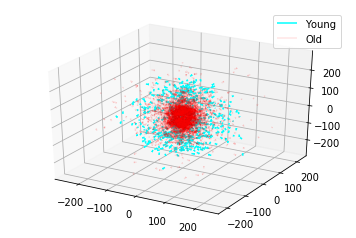

In [42]:
# Plot 3D representation of positions and velocities using arrows to denote velocity
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(7)
ax = fig.gca(projection='3d')

ax.quiver(yx,yy,yz,yvx,yvy,yvz, length=10.0, normalize=True, color='cyan', label='Young')
ax.quiver(ox,oy,oz,ovx,ovy,ovz, length=10.0, normalize=True, color='red', alpha=0.1, label='Old')

plt.legend()
plt.show()

In [43]:
# Try training using a random forest classifier on just the color magnitude data

from sklearn.ensemble import RandomForestClassifier
clf_color = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=23)

trainingcats = np.concatenate((np.ones(young_gmag.size),np.zeros(old_gmag.size)))  # 1 for young stars, 0 for old stars

trainingdata = np.zeros((young_gmag.size+old_gmag.size,3))
for i in xrange(trainingdata.shape[0]):
    if i < young_gmag.size:
        trainingdata[i][0] = young_rmag[i]
        trainingdata[i][1] = young_bmag[i]
        trainingdata[i][2] = young_gmag[i]
    else:
        trainingdata[i][0] = old_rmag[i-young_gmag.size]
        trainingdata[i][1] = old_bmag[i-young_gmag.size]
        trainingdata[i][2] = old_gmag[i-young_gmag.size]

clf_color = clf_color.fit(trainingdata,trainingcats)

category_color = []
for i in xrange(trainingdata.shape[0]):
    category_color.append(clf_color.predict([trainingdata[i]]))
category_color = np.array(category_color)
accuracy_color = np.mean(np.where(category_color==trainingcats,1,0))
print accuracy_color

0.8352543040506608


In [44]:
# Try training on just the position-velocity data

from sklearn.ensemble import RandomForestClassifier
clf_pv = RandomForestClassifier(n_estimators=100,max_depth=15,random_state=71)

trainingdata = np.zeros((yx.size+ox.size,6))
for i in xrange(trainingdata.shape[0]):
    if i < yx.size:
        trainingdata[i] = [yx[i],yy[i],yz[i],yvx[i],yvy[i],yvz[i]]
    else:
        j = i-yx.size
        trainingdata[i] = [ox[j],oy[j],oz[j],ovx[j],ovy[j],ovz[j]]

clf_pv = clf_pv.fit(trainingdata,trainingcats)

category_pv = []
for i in xrange(trainingdata.shape[0]):
    category_pv.append(clf_pv.predict([trainingdata[i]]))
category_pv = np.array(category_pv)
accuracy_pv = np.mean(np.where(category_pv==trainingcats,1,0))
print accuracy_pv

0.8231532463162645


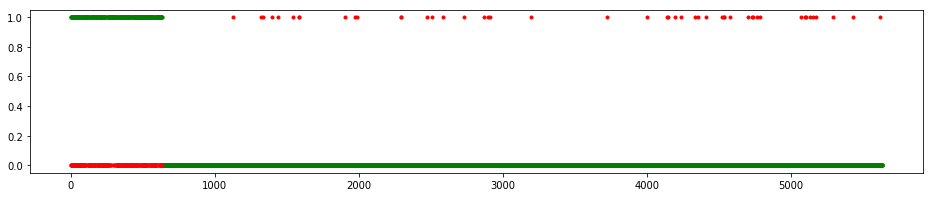

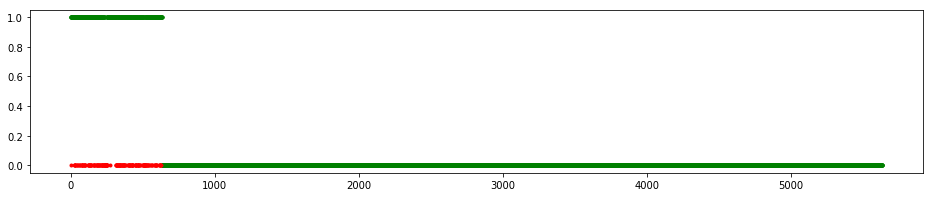

In [45]:
# Plot where errors occured

"""
In the scatterplots below, 1 corresponds to categorizing a star as young, and 0 as old.
Points which are green were categorized correctly, while red were categorized incorrectly.
The plots show that these RFCs were more successful when categorizing old stars in the dataset than young stars.
Using just color data, the RFC tends to occasionally miscategorize old stars, while the position-velocity data
seems to always correctly categorize old stars.
"""

x = np.arange(category_color.size)
category_color = category_color.flatten()
category_pv = category_pv.flatten()
plt.figure(12,figsize=(16,3))
plt.plot(x[np.where(category_color==trainingcats)],category_color[np.where(category_color==trainingcats)],'g.')
plt.plot(x[np.where(category_color!=trainingcats)],category_color[np.where(category_color!=trainingcats)],'r.')
#plt.xlim(0,650)
plt.show()

plt.figure(13,figsize=(16,3))
plt.plot(x[np.where(category_pv==trainingcats)],category_pv[np.where(category_pv==trainingcats)],'g.')
plt.plot(x[np.where(category_pv!=trainingcats)],category_pv[np.where(category_pv!=trainingcats)],'r.')
#plt.xlim(0,650)
plt.show()

In [56]:
# In the full dataset from the Gaia subset used in this project
# remove all stars with > 5% uncertainty in their parallax
# or relatively high error in their proper motiom

# Check how many stars fall into each category and compara to the amount in the entire dataset
print len(gaia_data['Plx'])
print len(np.where(gaia_data['e_Plx']>0.05*gaia_data['Plx'])[0])
print len(np.where(gaia_data['e_pmDE']>0.2)[0])
print len(np.where(gaia_data['e_pmRA']>0.2)[0])

where_plx = np.where(gaia_data['e_Plx']>0.05*gaia_data['Plx'],0,1)
where_pmra = np.where(gaia_data['e_pmRA']>0.2,0,1)
where_pmde = np.where(gaia_data['e_pmDE']>0.2,0,1)
subset = np.where(where_plx*where_pmra*where_pmde)
print len(gaia_data['Plx'])-len(subset[0])

569365
521
4765
7150
7864
89.89830631223


In [67]:
# Use the position-velocity data to categorize the entire dataset into young/old stars

gaia_dist = 1000.0/gaia_data['Plx']
gaia_p,gaia_v = rvpm_to_xyz(gaia_data['RV'],gaia_data['pmRA'],gaia_data['pmDE'],gaia_data['RA_ICRS'],gaia_data['DE_ICRS'],gaia_dist)
gaia_pv_data = np.vstack((gaia_p,gaia_v)).T
gaia_cat_pv = clf_pv.predict(gaia_pv_data[subset])

gaia_categories = Table([gaia_data['DR2Name'][subset],gaia_cat_pv],names=['DR2ID','Category'],dtype=[str,str])

gaia_categories.write('Gaia_Categorization_young_old.fits',format='fits',overwrite=True)